# Importing Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.graphics.regressionplots import influence_plot
import statsmodels.formula.api as smf
sns.set_theme(style='darkgrid',palette = 'rainbow')
import warnings
warnings.filterwarnings('ignore')

# Importing Data

In [2]:
trd = pd.read_csv('Titan_train.csv')
trd

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


# EDA

In [3]:
trd.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
trd.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [5]:
trd.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [6]:
trd.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

<Figure size 3000x2500 with 0 Axes>

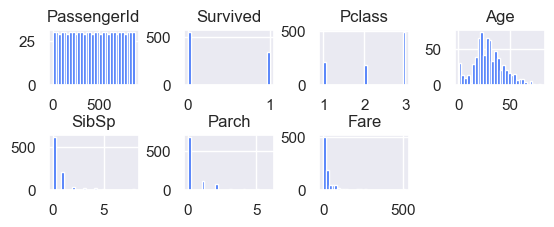

In [7]:
# Visualistaion

plt.figure(figsize=(30,25))
plt.tight_layout()
trd.hist(layout=(4,4),bins=30)
plt.subplots_adjust(hspace = 0.9,wspace = 0.5)
plt.show()

Text(0.5, 1.0, 'Titanic')

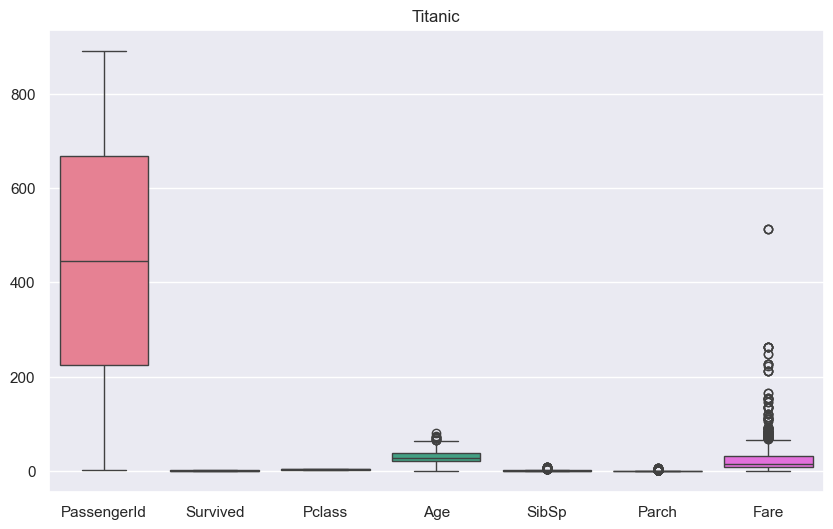

In [8]:
# Boxplot

plt.figure(figsize=(10,6))
sns.boxplot(trd)
plt.title("Titanic")

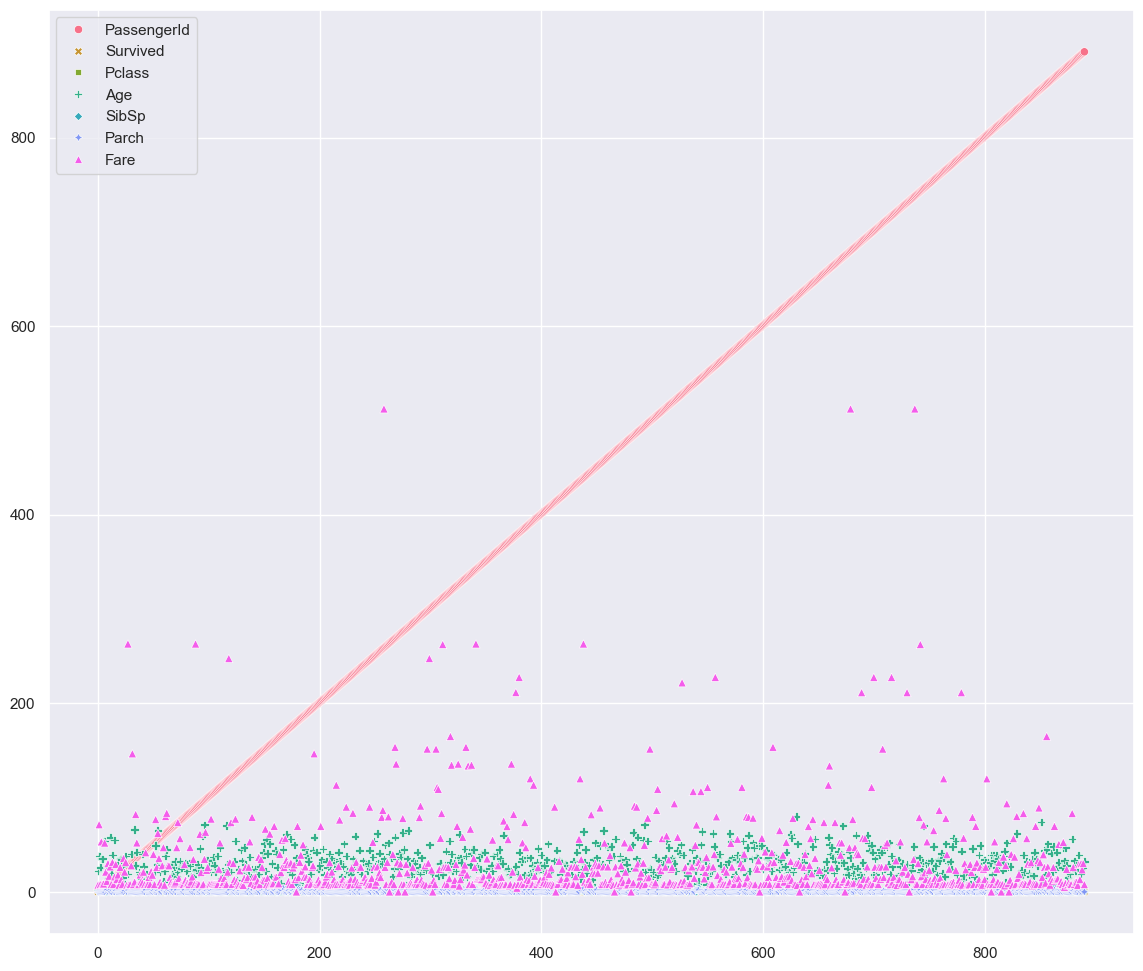

In [9]:
# scatter plot

plt.figure(figsize=(14,12))
sns.scatterplot(data=trd)
plt.show()

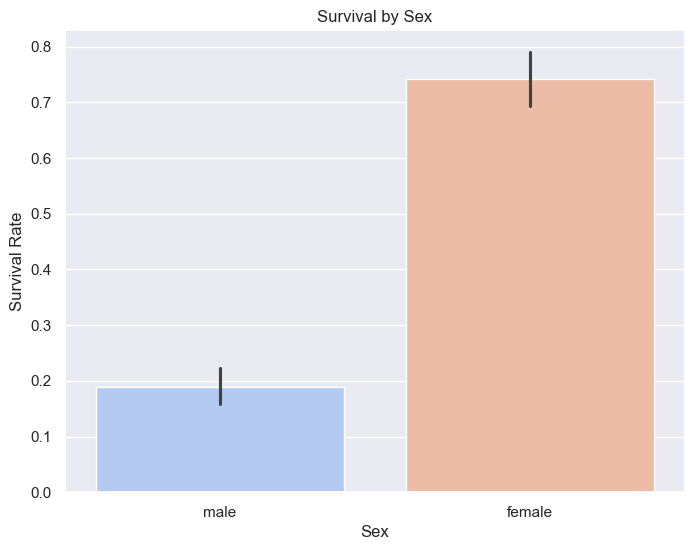

In [10]:
# Barplot

plt.figure(figsize=(8,6))
sns.barplot(data=trd, x='Sex', y='Survived', palette='coolwarm')
plt.title('Survival by Sex')
plt.xlabel('Sex')
plt.ylabel('Survival Rate')
plt.show()

# Data Preprocessing

In [11]:
trd.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [12]:
# as we can see that there are too many null values in Age columns so replacing it with mean.

trd['Age'] = trd['Age'].fillna(trd['Age'].mean())

In [13]:
# dropping unwanted columns

trd.drop(columns = ['Cabin'],inplace = True)
trd

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.000000,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.000000,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.000000,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.000000,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.000000,0,0,373450,8.0500,S
...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.000000,0,0,211536,13.0000,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.000000,0,0,112053,30.0000,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,29.699118,1,2,W./C. 6607,23.4500,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.000000,0,0,111369,30.0000,C


In [14]:
# Converting into Dummies

trd = pd.get_dummies(trd,columns=['Embarked'],dtype=int)
trd

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked_C,Embarked_Q,Embarked_S
0,1,0,3,"Braund, Mr. Owen Harris",male,22.000000,1,0,A/5 21171,7.2500,0,0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.000000,1,0,PC 17599,71.2833,1,0,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.000000,0,0,STON/O2. 3101282,7.9250,0,0,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.000000,1,0,113803,53.1000,0,0,1
4,5,0,3,"Allen, Mr. William Henry",male,35.000000,0,0,373450,8.0500,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.000000,0,0,211536,13.0000,0,0,1
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.000000,0,0,112053,30.0000,0,0,1
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,29.699118,1,2,W./C. 6607,23.4500,0,0,1
889,890,1,1,"Behr, Mr. Karl Howell",male,26.000000,0,0,111369,30.0000,1,0,0


In [15]:
# Encoding Categorical 

from sklearn.preprocessing import LabelEncoder
labelencoder = LabelEncoder()
for columns in trd.columns:
    trd[columns]=labelencoder.fit_transform(trd[columns])

In [16]:
trd.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked_C,Embarked_Q,Embarked_S
0,0,0,2,108,1,28,1,0,523,18,0,0,1
1,1,1,0,190,0,52,1,0,596,207,1,0,0
2,2,1,2,353,0,34,0,0,669,41,0,0,1
3,3,1,0,272,0,48,1,0,49,189,0,0,1
4,4,0,2,15,1,48,0,0,472,43,0,0,1


# Now Clean the Test Data Test

In [17]:
ted = pd.read_csv('Titan_test.csv')
ted

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


In [18]:
# checking for null values

ted.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [19]:
# as we can see that there are too many null values in Age columns so replacing it with mean.

ted['Age'] = ted['Age'].fillna(ted['Age'].mean())
ted

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.50000,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.00000,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.00000,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.00000,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.00000,1,1,3101298,12.2875,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",male,30.27259,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.00000,0,0,PC 17758,108.9000,C105,C
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.50000,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,3,"Ware, Mr. Frederick",male,30.27259,0,0,359309,8.0500,NaN,S


In [20]:
# Now Dropping Unwanted Columns

ted.drop(columns=['Cabin'],inplace=True)
ted.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,S


In [21]:
# converting object 

ted = pd.get_dummies(ted,columns=['Embarked'],dtype=int)
ted.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked_C,Embarked_Q,Embarked_S
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,0,1,0
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,0,0,1
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,0,1,0
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,0,0,1
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,0,0,1


In [22]:
# Encoding Categorical 

from sklearn.preprocessing import LabelEncoder
labelencoder = LabelEncoder()
for columns in ted.columns:
    ted[columns]=labelencoder.fit_transform(ted[columns])

In [23]:
ted.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked_C,Embarked_Q,Embarked_S
0,0,2,206,1,45,0,0,152,24,0,1,0
1,1,2,403,0,61,1,0,221,5,0,0,1
2,2,1,269,1,75,0,0,73,41,0,1,0
3,3,2,408,1,34,0,0,147,34,0,0,1
4,4,2,178,0,27,1,1,138,46,0,0,1


In [24]:
# Date Prepartion

from sklearn.model_selection import train_test_split
x = trd.drop('Survived',axis=1)
y = trd['Survived']

In [25]:
xtrain,xtest,ytrain,ytest = train_test_split(x,y,train_size = 0.2 , random_state = 1)

In [26]:
# Model Building
from sklearn.linear_model import LogisticRegression

In [27]:
logomodel = LogisticRegression()
logomodel.fit(xtrain,ytrain)

LogisticRegression()

In [28]:
logomodel.score(xtrain,ytrain)

0.797752808988764

In [29]:
logomodel.score(xtest,ytest)

0.7685834502103787

In [30]:
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

In [31]:
y_predict_train=logomodel.predict(xtrain)

In [32]:
print(classification_report(ytrain,y_predict_train))

              precision    recall  f1-score   support

           0       0.81      0.91      0.85       117
           1       0.77      0.59      0.67        61

    accuracy                           0.80       178
   macro avg       0.79      0.75      0.76       178
weighted avg       0.79      0.80      0.79       178



# Build predictive models using LightGBM and XGBoost algorithms.

In [33]:
#!pip install lightgbm xgboost

In [34]:
# Build Predictive Model

import lightgbm as lgb
import xgboost as xgb
from lightgbm import LGBMClassifier
from xgboost import XGBClassifier

In [35]:
# Auto Model Prediction
def prediction(model):
    model.fit(xtrain,ytrain)
    yp = model.predict(xtest)
    print(f"Train Accuracy: {model.score(xtrain,ytrain)}")
    print(f"Test Accuracy: {model.score(xtest,ytest)}")
    print(classification_report(ytest,yp))

In [36]:
prediction(XGBClassifier())

Train Accuracy: 1.0
Test Accuracy: 0.7657784011220197
              precision    recall  f1-score   support

           0       0.78      0.85      0.82       432
           1       0.74      0.63      0.68       281

    accuracy                           0.77       713
   macro avg       0.76      0.74      0.75       713
weighted avg       0.76      0.77      0.76       713



In [37]:
prediction(LGBMClassifier())

[LightGBM] [Info] Number of positive: 61, number of negative: 117
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000091 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 276
[LightGBM] [Info] Number of data points in the train set: 178, number of used features: 11
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.342697 -> initscore=-0.651300
[LightGBM] [Info] Start training from score -0.651300
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf


# Train the models on the training set and evaluate their performance on the testing set.

In [38]:
from sklearn.ensemble import GradientBoostingClassifier, StackingClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import cross_val_score

In [39]:
xgb_model = xgb.XGBClassifier()
xgb_model.fit(xtrain, ytrain)
y_pred_xgb = xgb_model.predict(xtest)

accuracy_xgb = accuracy_score(ytest, y_pred_xgb)
roc_auc_xgb = roc_auc_score(ytest, y_pred_xgb)

print(f"XGBoost Accuracy: {accuracy_xgb:.4f}")
print(f"XGBoost ROC AUC: {roc_auc_xgb:.4f}")

XGBoost Accuracy: 0.7658
XGBoost ROC AUC: 0.7420


# Use techniques like cross-validation and hyperparameter tuning to optimize model performance.

## Cross Vallidation LightGBM

In [40]:
from sklearn.model_selection import cross_val_score
import lightgbm as lgb
import xgboost as xgb

In [41]:
# Cross-validation for LightGBM
lgbm_model = lgb.LGBMClassifier()

In [42]:
# Evaluate the model using 5-fold cross-validation
lgbm_cv_scores = cross_val_score(lgbm_model, x, y, cv=5, scoring='accuracy')

[LightGBM] [Info] Number of positive: 273, number of negative: 439
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000167 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 915
[LightGBM] [Info] Number of data points in the train set: 712, number of used features: 12
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.383427 -> initscore=-0.475028
[LightGBM] [Info] Start training from score -0.475028
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf

In [43]:
# Print the mean cross-validation score
print(f"LightGBM Mean Cross-Validation Accuracy: {lgbm_cv_scores.mean():.4f}")

LightGBM Mean Cross-Validation Accuracy: 0.7970


# Cross Vallidation XGBoost

In [44]:
# Cross-validation for XGBoost
xgb_model = xgb.XGBClassifier()

# Evaluate the model using 5-fold cross-validation
xgb_cv_scores = cross_val_score(xgb_model, x, y, cv=5, scoring='accuracy')

# Print the mean cross-validation score
print(f"XGBoost Mean Cross-Validation Accuracy: {xgb_cv_scores.mean():.4f}")


XGBoost Mean Cross-Validation Accuracy: 0.7902


# Hyperparameter Tuning


In [45]:
from sklearn.model_selection import GridSearchCV

In [46]:
# Define the hyperparameter grid for LightGBM
param_grid_lgb = {
    'num_leaves': [31, 50, 100],
    'learning_rate': [0.01, 0.1, 0.2],
    'n_estimators': [50, 100, 200]
}

In [47]:
# Initialize the LightGBM model
lgbm_model = lgb.LGBMClassifier()

In [48]:
# Perform GridSearchCV with 5-fold cross-validation
grid_search_lgb = GridSearchCV(lgbm_model, param_grid_lgb, cv=5, scoring='accuracy', n_jobs=-1)
grid_search_lgb.fit(xtrain, ytrain)

[LightGBM] [Info] Number of positive: 61, number of negative: 117
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000147 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 276
[LightGBM] [Info] Number of data points in the train set: 178, number of used features: 11
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.342697 -> initscore=-0.651300
[LightGBM] [Info] Start training from score -0.651300
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf


GridSearchCV(cv=5, estimator=LGBMClassifier(), n_jobs=-1,
             param_grid={'learning_rate': [0.01, 0.1, 0.2],
                         'n_estimators': [50, 100, 200],
                         'num_leaves': [31, 50, 100]},
             scoring='accuracy')

In [49]:
# Best hyperparameters and score
print(f"Best LightGBM Hyperparameters: {grid_search_lgb.best_params_}")
print(f"Best LightGBM Cross-Validation Accuracy: {grid_search_lgb.best_score_:.4f}")


Best LightGBM Hyperparameters: {'learning_rate': 0.1, 'n_estimators': 100, 'num_leaves': 31}
Best LightGBM Cross-Validation Accuracy: 0.8203


In [50]:
# Define the hyperparameter grid for XGBoost
param_grid_xgb = {
    'learning_rate': [0.01, 0.05, 0.1],
    'max_depth': [3, 5, 7],
    'n_estimators': [50, 100, 200]
}

In [51]:
# Initialize the XGBoost model
xgb_model = xgb.XGBClassifier()

In [52]:
# Perform GridSearchCV with 5-fold cross-validation
grid_search_xgb = GridSearchCV(xgb_model, param_grid_xgb, cv=5, scoring='accuracy', n_jobs=-1)
grid_search_xgb.fit(xtrain, ytrain)

GridSearchCV(cv=5,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, device=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, gamma=None,
                                     grow_policy=None, importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None,...
                                     max_cat_to_onehot=None,
                                     max_delta_step=None, max_depth=None,
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     multi_strategy=None, n_estimators=None,
                                     n_jobs=None, num_parallel_tree=None,
                                     random_state=None, ...),
             n_jobs=-1,
             param_grid={'learning_rate': [0.01, 0.05, 0.1],
                         'max_depth': [3, 5, 7],
                         'n_estimators': [50, 100, 200]},
             scoring='accuracy')

In [53]:
# Best hyperparameters and score
print(f"Best XGBoost Hyperparameters: {grid_search_xgb.best_params_}")
print(f"Best XGBoost Cross-Validation Accuracy: {grid_search_xgb.best_score_:.4f}")

Best XGBoost Hyperparameters: {'learning_rate': 0.05, 'max_depth': 7, 'n_estimators': 100}
Best XGBoost Cross-Validation Accuracy: 0.8595


# Comparative Analysis

In [54]:
from sklearn.metrics import accuracy_score, precision_score, recall_score

lgbm_model.fit(xtrain, ytrain)
lgbm_pred = lgbm_model.predict(xtest)
# LightGBM metrics
lgbm_accuracy = accuracy_score(ytest, lgbm_pred)
lgbm_precision = precision_score(ytest, lgbm_pred)
lgbm_recall = recall_score(ytest, lgbm_pred)

# XGBoost metrics
xgb_accuracy = accuracy_score(ytest, y_pred_xgb)
xgb_precision = precision_score(ytest,y_pred_xgb)
xgb_recall = recall_score(ytest, y_pred_xgb)

# Create a DataFrame for easy visualization
metrics = {
    'Metric': ['Accuracy', 'Precision', 'Recall'],
    'LightGBM': [lgbm_accuracy, lgbm_precision, lgbm_recall],
    'XGBoost': [xgb_accuracy, xgb_precision, xgb_recall]
}

metrics_df = pd.DataFrame(metrics)

# Print the comparison table
print(metrics_df)



[LightGBM] [Info] Number of positive: 61, number of negative: 117
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000051 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 276
[LightGBM] [Info] Number of data points in the train set: 178, number of used features: 11
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.342697 -> initscore=-0.651300
[LightGBM] [Info] Start training from score -0.651300
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf


## Visualize the result

<Figure size 800x600 with 0 Axes>

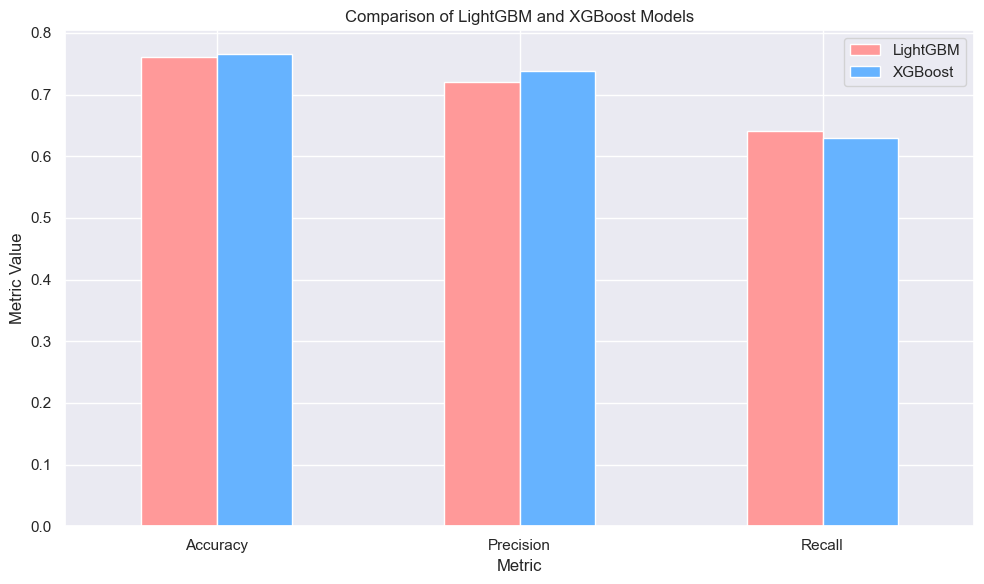

In [55]:
# Set up the figure for plotting
plt.figure(figsize=(8, 6))
metrics_df.set_index('Metric').plot(kind='bar', figsize=(10, 6), color=['#ff9999','#66b3ff'])
plt.title('Comparison of LightGBM and XGBoost Models')
plt.ylabel('Metric Value')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

 # Summary

## Key Points:
### Performance Comparison:
#### LightGBM and XGBoost perform similarly but may differ slightly in accuracy, speed, and resource usage.
##### Advantages of LightGBM:
- Faster training due to histogram-based techniques.
- Handles large datasets efficiently.
##### Advantages of XGBoost:
- Robust to overfitting with regularization.
- Excellent performance for structured datasets.
##### Practical Implications:
- Use LightGBM for speed and resource efficiency in large datasets.
- Use XGBoost for fine-tuned performance, especially with imbalanced data.